## Mathematical Optimization Series

# Part 3: Conservative steplength rules

In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as callib
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import linear_algebra_library as linlib
import autograd.numpy as np
import time

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

1.  Exact line search
2.  Back tracking line search
3.  Conservative fixed steplength

# 1. Line search methods

## 1.1 Exact line search

Ideally looking down the direction of descent for the steplength providing the smallest value.  


$$
\alpha^\star = \underset{\alpha \in \mathcal{A}}{\text{argmin}} \,\,   g\left( \mathbf{w}^{k-1} - \alpha \nabla g\left(\mathbf{w}^{k-1} \right) \right)
$$

It is almost always far more expensive to calculate this value than it is to use any other steplength rule.  Every steplength we try requires an evaluation of the function, and we have no sense in general what a) the maximum steplength value we should try and b) how many values in between zero and this maximum value to try.

<IPython.core.display.Javascript object>


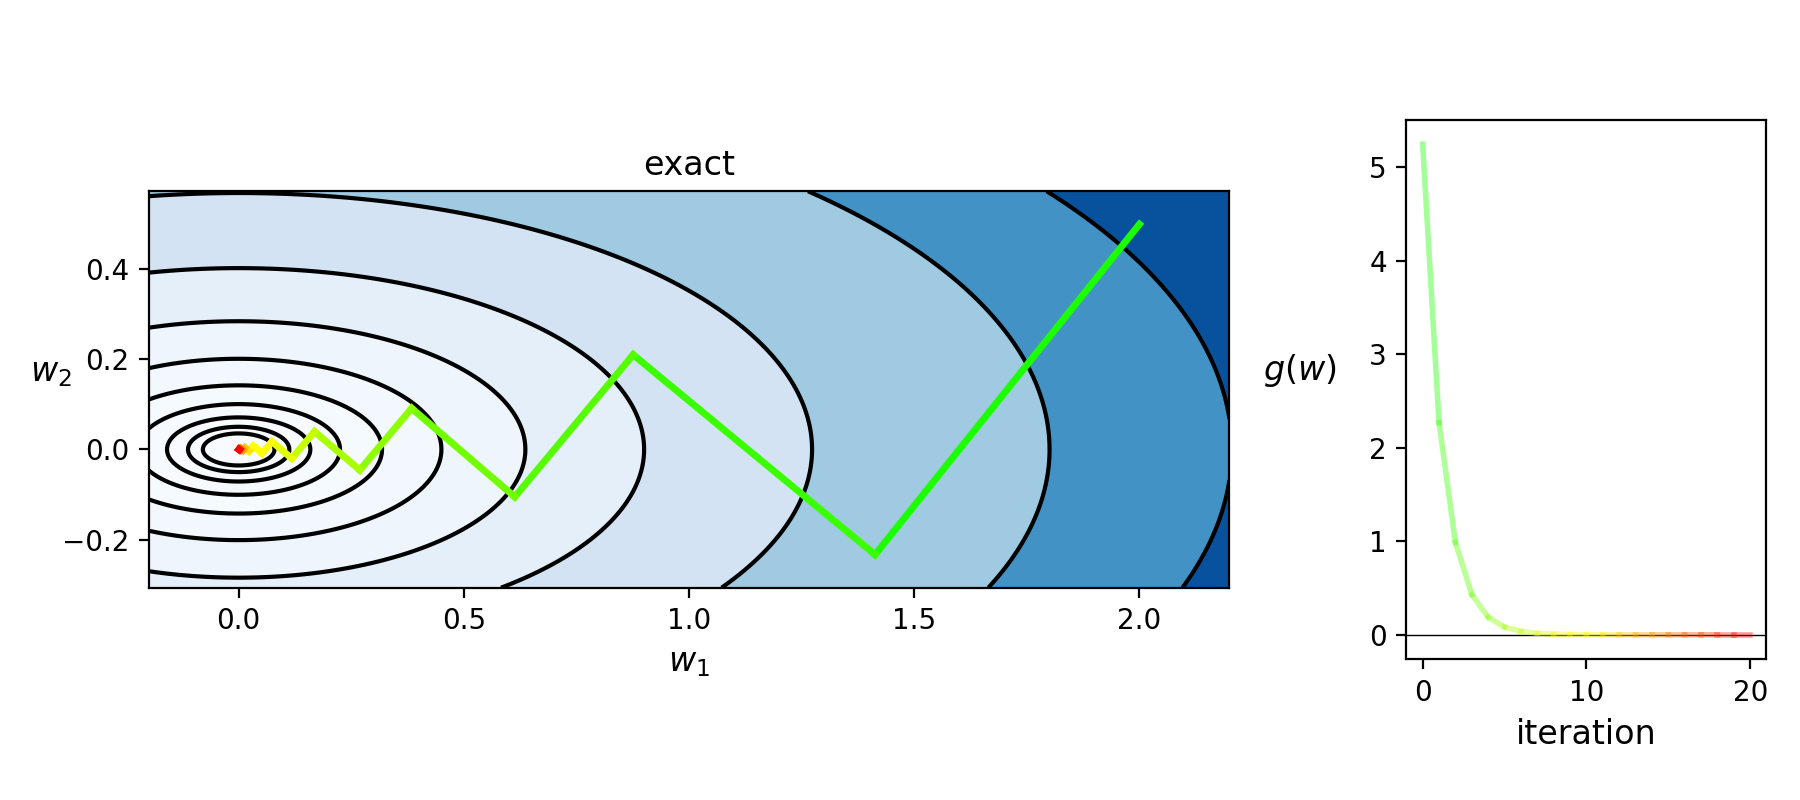

<IPython.core.display.Javascript object>


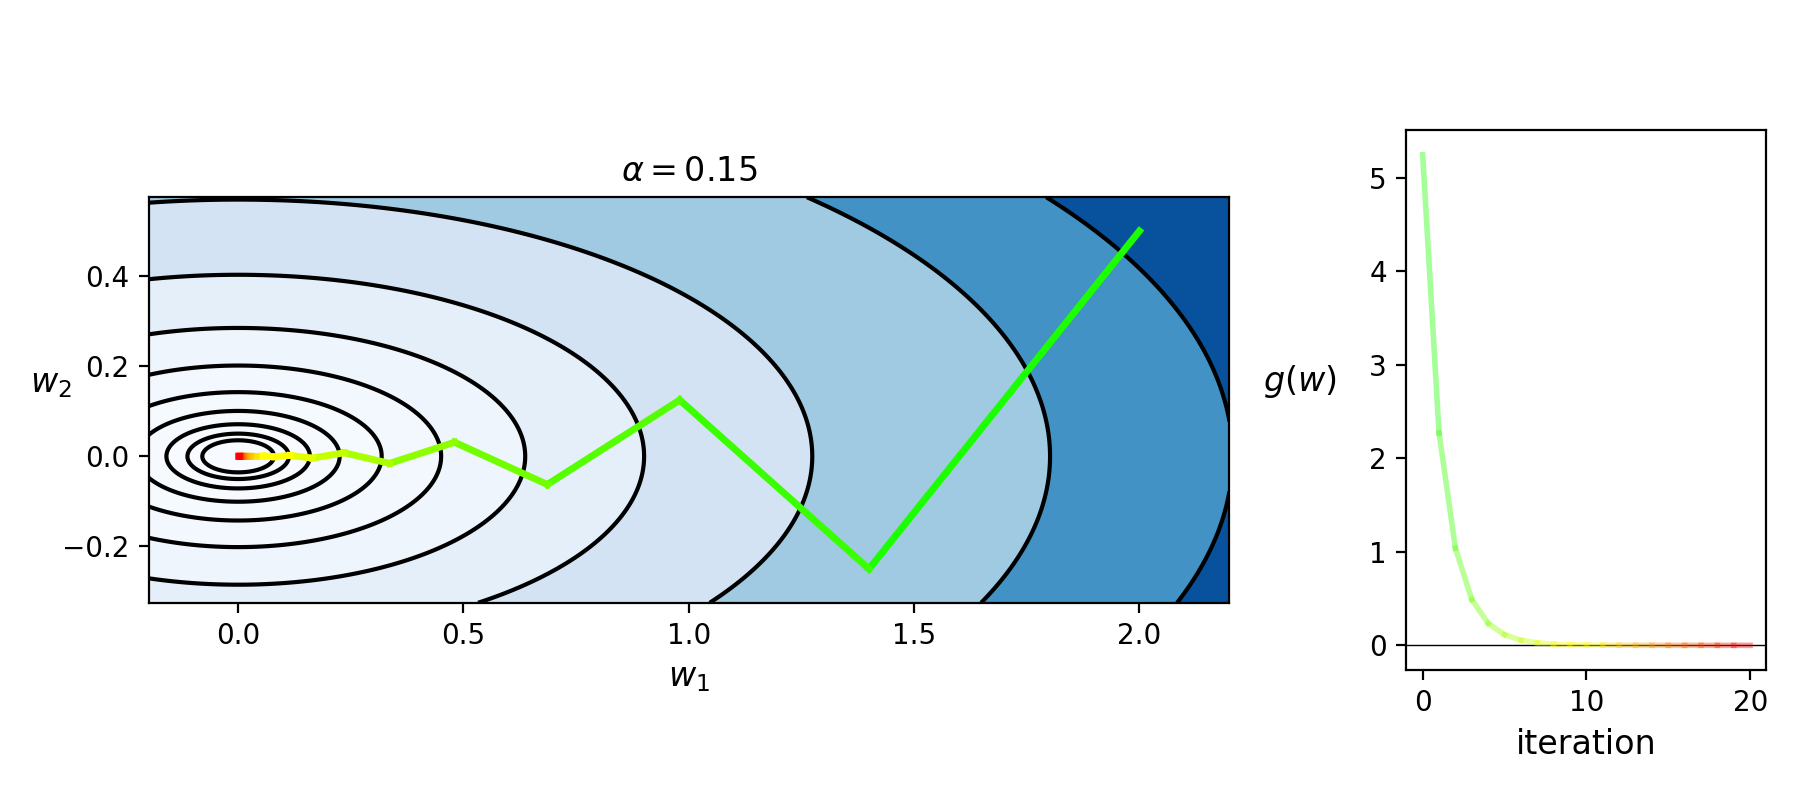

In [313]:
# what function should we play with?  Defined in the next line.
g = lambda w: w[0]**2 + 5*w[1]**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.convservative_steplength_demos.visualizer();
w_init = [2,0.5]; max_its = 20; steplength_vals = ['exact',0.15];

demo.run(g,w_init,steplength_vals,max_its,version = 'unnormalized',num_contours = 30)

<IPython.core.display.Javascript object>


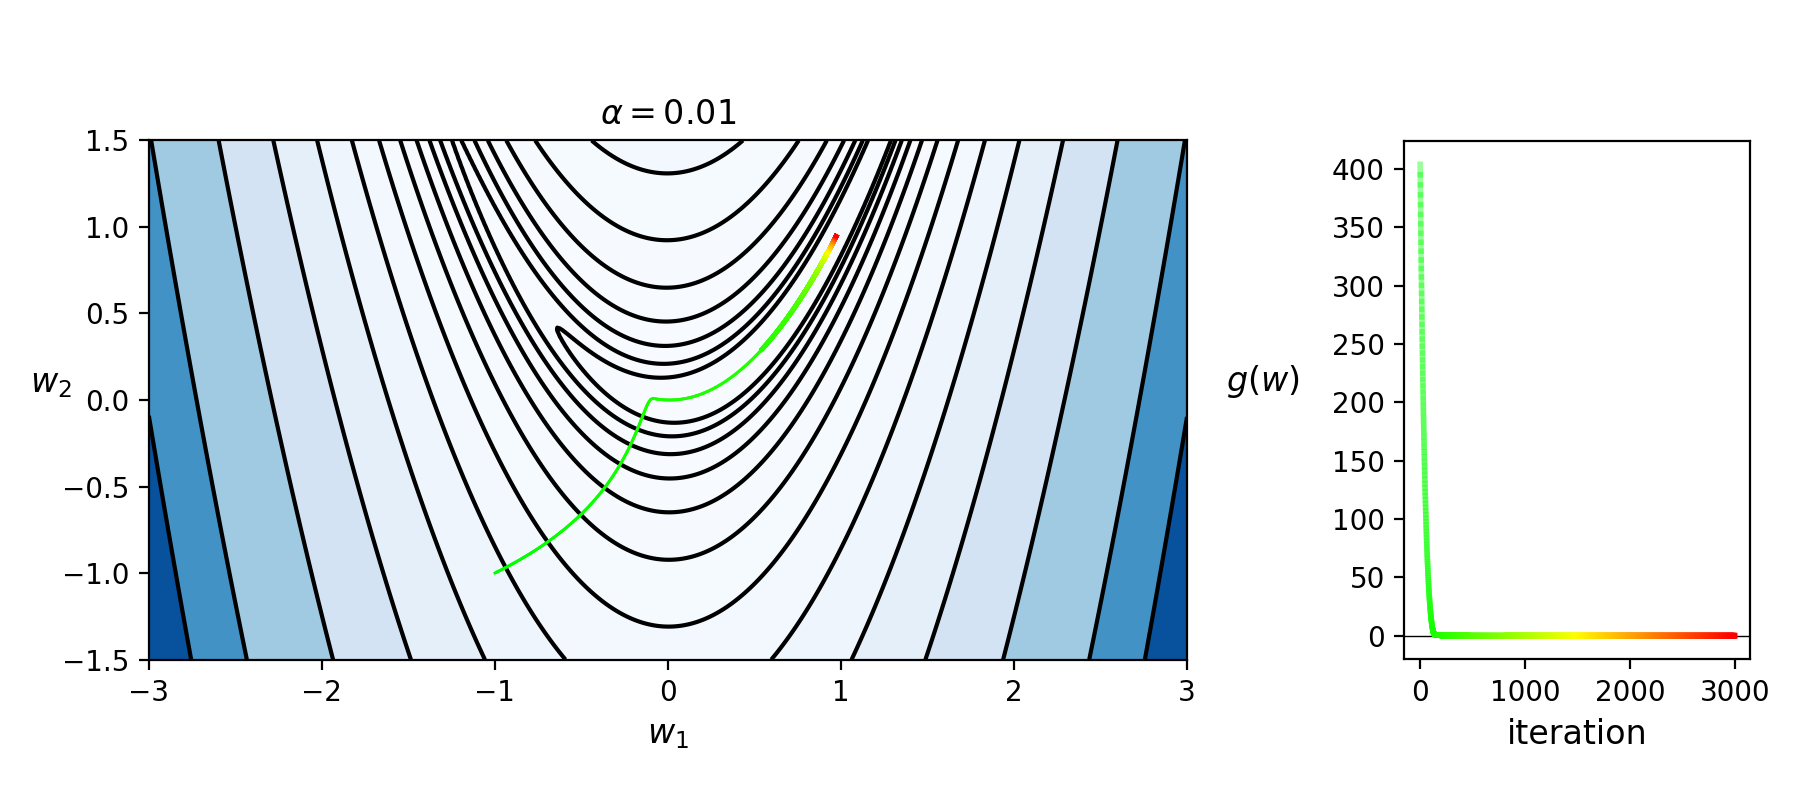

In [308]:
# the Rosenbrock function
g = lambda w: 100*(w[1]-w[0]**2)**2 + (w[0]-1)**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.convservative_steplength_demos.visualizer();
w_init = [-1,-1]; max_its = 3000; steplength_vals = [0.01]; version = 'normalized';

demo.run(g,w_init,steplength_vals,max_its,version = version,num_contours = 38,linewidth = 1,xmin = -3, xmax = 3, ymin = -1.5, ymax = 1.5)

<IPython.core.display.Javascript object>


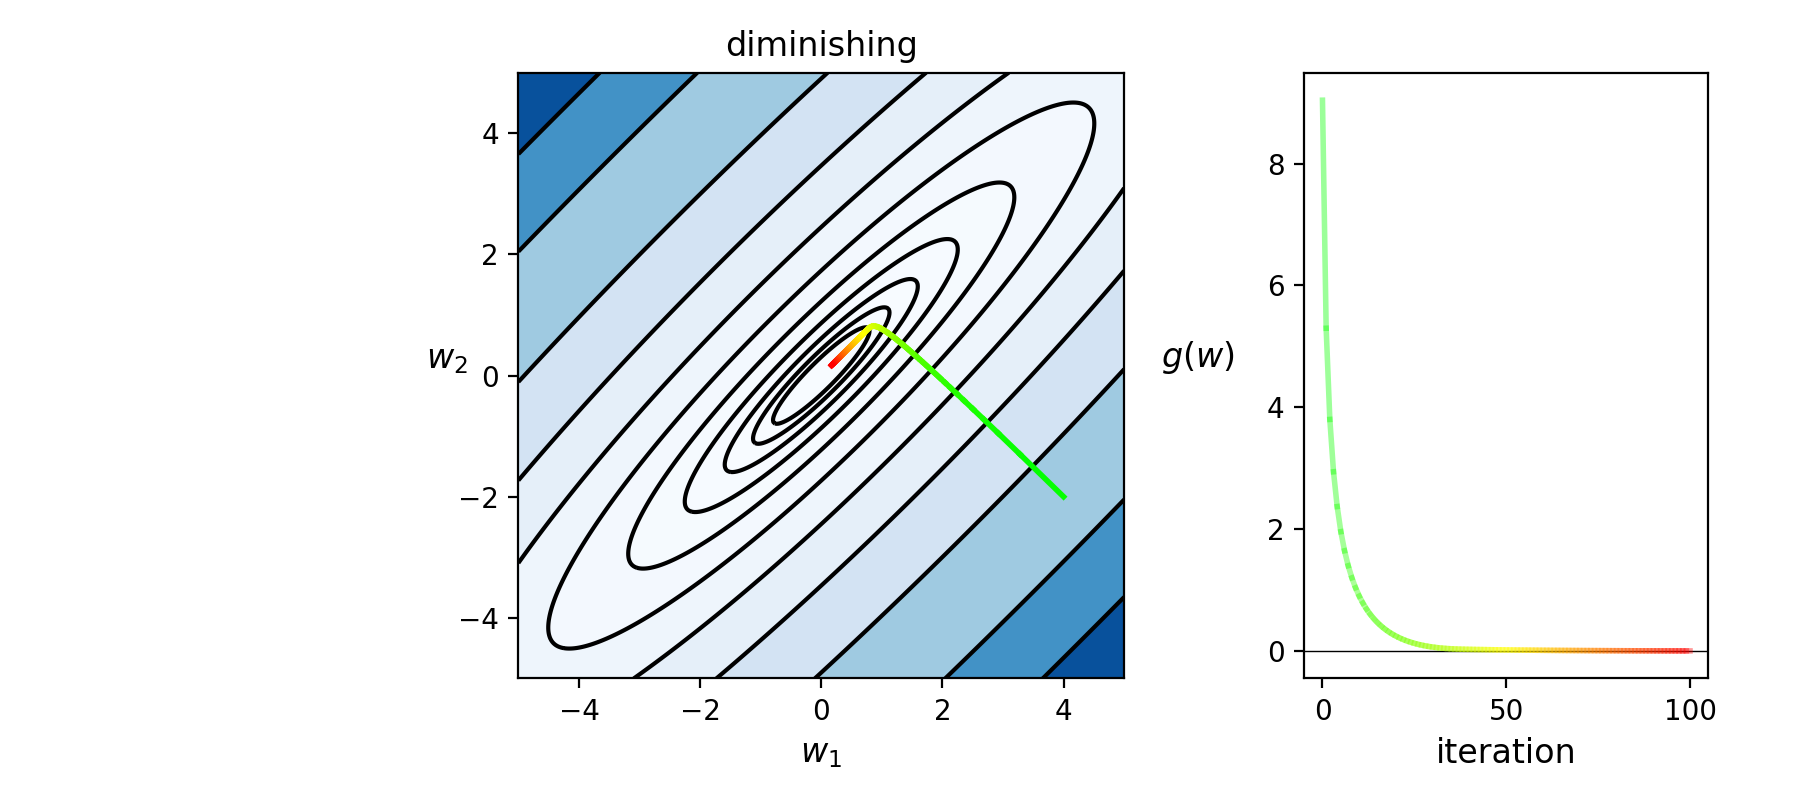

<IPython.core.display.Javascript object>


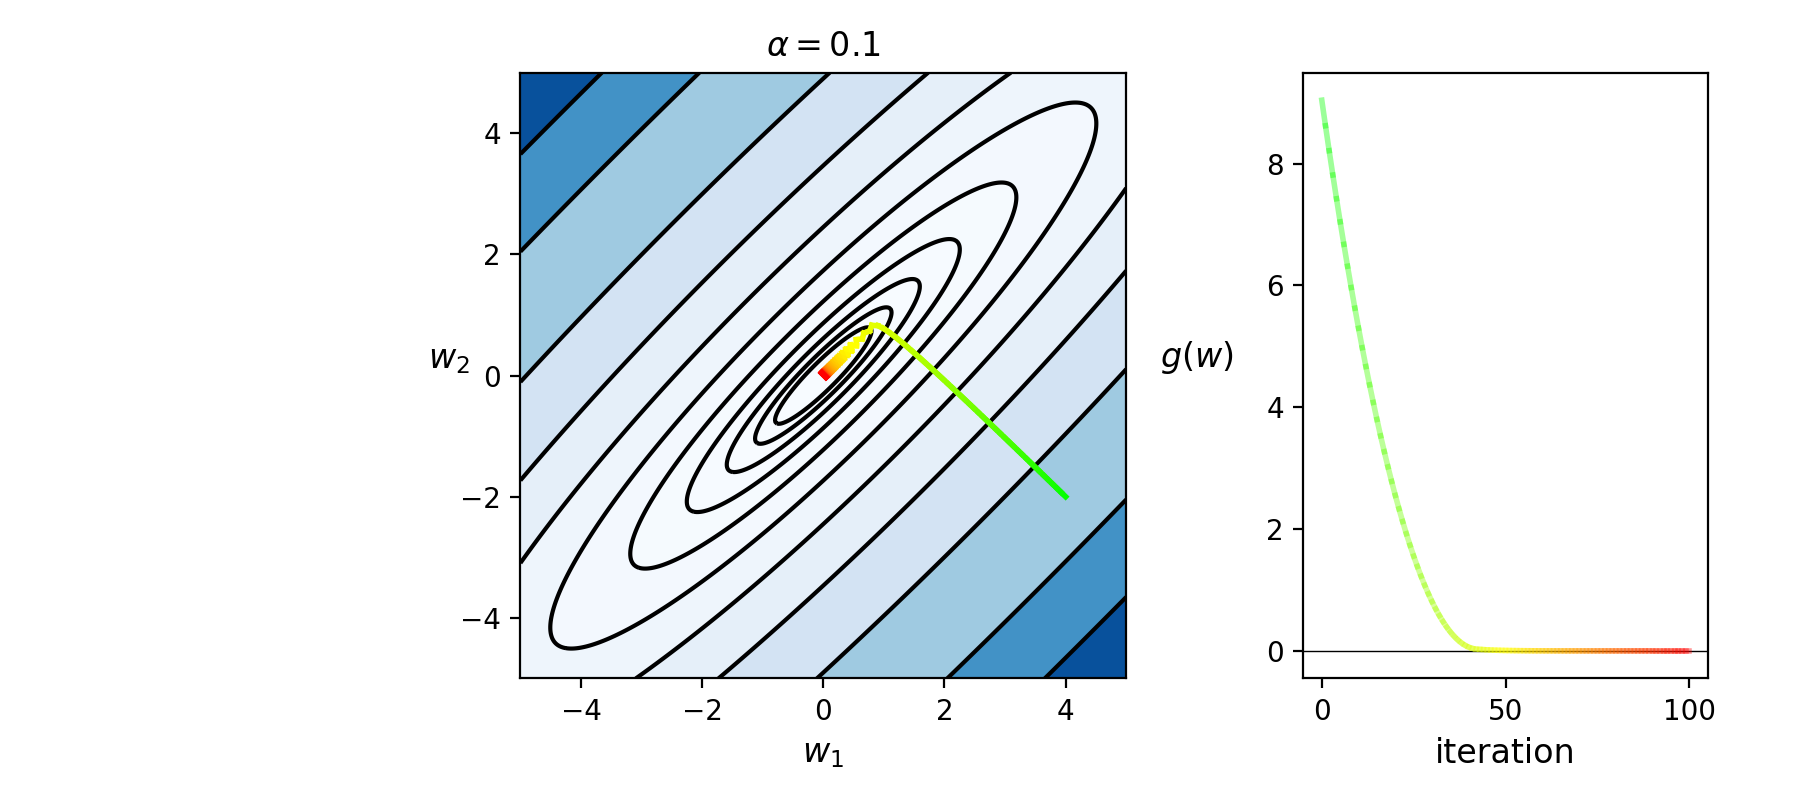

In [307]:
# the Rastrigin function
g = lambda w: 0.26*(w[0]**2 + w[1]**2) - 0.48*w[0]*w[1]

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.convservative_steplength_demos.visualizer();
w_init = [4,-2]; max_its = 100; steplength_vals = ['diminishing',0.1]; version = 'normalized';

demo.run(g,w_init,steplength_vals,max_its,version = version,num_contours = 30,linewidth = 2,xmin = -5, xmax = 5, ymin = -5, ymax = 5)